In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
datasets=pd.read_csv(r"C:\Users\user\Desktop\避孕\cmc.csv")

In [202]:
datasets.drop_duplicates()
(datasets.astype(str) == ' ?').any(1)
datasets = datasets[~(datasets.astype(str) == ' ?').any(1)]
lack = datasets.isnull()

In [203]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in datasets.columns:
    datasets[col]=label.fit_transform(datasets[col])

In [204]:
y=datasets['Contraceptive method used']
x=datasets.drop('Contraceptive method used',axis=1)

In [205]:
x_train,x_test,y_train,y_test = train_test_split\
(x,y,test_size=0.3)

In [206]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
from IPython.display import Image
import os
feature_name=list(datasets.columns)
model=DecisionTreeClassifier()
model_tree=model.fit(x_train,y_train)

In [207]:
import os
dot_tree=tree.export_graphviz(model,out_file=None,feature_names=feature_name[:9],class_names=["1","2","3"],
                             filled=False,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_tree)

In [208]:
from io import StringIO
import io
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [209]:
clf.predict(x_train)
clf.score(x_train,y_train)

0.9602327837051406

In [210]:
clf.predict(x_test)
clf.score(x_test,y_test)

0.4819004524886878

In [211]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

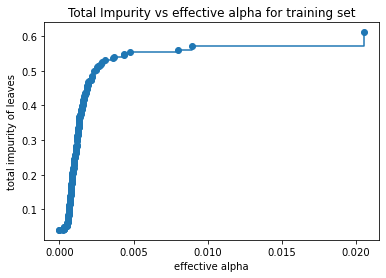

In [212]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [213]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03425614835929036


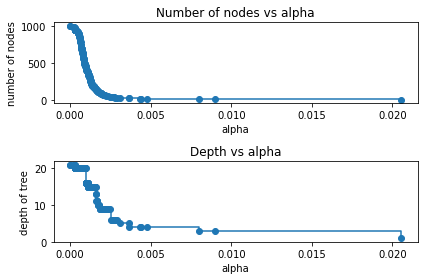

In [214]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

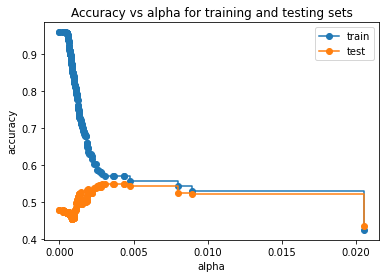

In [215]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

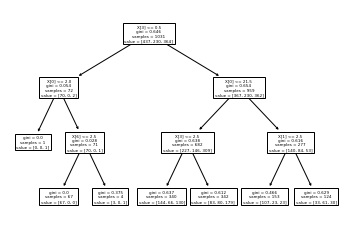

In [216]:
from io import StringIO
import io
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(x_train,y_train)

tree.plot_tree(clf);


In [217]:
clf.predict(x_train)
clf.score(x_train,y_train)

0.545101842870999

In [218]:
clf.predict(x_test)
clf.score(x_test,y_test)

0.5226244343891403

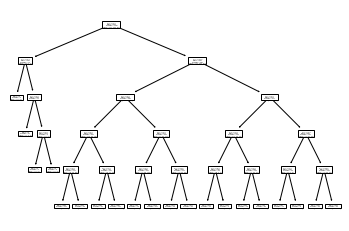

In [219]:
from io import StringIO
import io
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf.fit(x_train,y_train)

tree.plot_tree(clf);

In [220]:
clf.predict(x_train)
clf.score(x_train,y_train)

0.5780795344325897

In [221]:
clf.predict(x_test)
clf.score(x_test,y_test)

0.5294117647058824

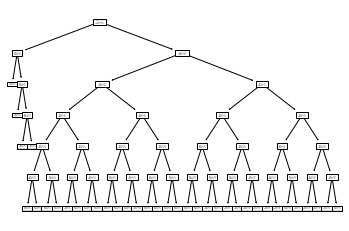

In [222]:
from io import StringIO
import io
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=6)
clf.fit(x_train,y_train)

tree.plot_tree(clf);

In [223]:
clf.predict(x_train)
clf.score(x_train,y_train)

0.6159068865179438

In [224]:
clf.predict(x_test)
clf.score(x_test,y_test)

0.5361990950226244